# **GRU**

In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,GRU,Dense
from tensorflow.keras.preprocessing import sequence

In [ ]:
max_words = 5000
(xt,yt),(xte,yte)= imdb.load_data(num_words=max_words)

max_len =500
xt=sequence.pad_sequences(xt,maxlen=max_len)
xte=sequence.pad_sequences(xte,maxlen=max_len)

model=Sequential()
model.add(Embedding(max_words,100,input_length=max_len))
model.add(GRU(128))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
batch_size=128
epochs=5
model.fit(xt,yt,batch_size=batch_size,epochs=epochs)


Epoch 1/5
196/196 [==============================] - 32s 154ms/step - loss: 0.4701 - accuracy: 0.7646
Epoch 2/5
196/196 [==============================] - 20s 100ms/step - loss: 0.2815 - accuracy: 0.8852
Epoch 3/5
196/196 [==============================] - 15s 76ms/step - loss: 0.2373 - accuracy: 0.9076
Epoch 4/5
196/196 [==============================] - 12s 59ms/step - loss: 0.1839 - accuracy: 0.9298
Epoch 5/5
196/196 [==============================] - 9s 46ms/step - loss: 0.1565 - accuracy: 0.9425


In [ ]:
#mse for regression prblm output only 1
#binary cross entropy for binary output only 2
#categorical cross entropy for multiple ourput more than 2
#activation - sigmoid relu tanh
#optimizer - stocasticgd gd adam

In [ ]:
loss,accuracy=model.evaluate(xte,yte,batch_size=batch_size)
print("accuracy:",accuracy)
print("loss:",loss)

196/196 [==============================] - 3s 13ms/step - loss: 0.3304 - accuracy: 0.8656
accuracy: 0.8655999898910522
loss: 0.33035674691200256


In [ ]:
history=model.fit(xt,yt,batch_size=batch_size,epochs=epochs)

Epoch 1/5
196/196 [==============================] - 9s 46ms/step - loss: 0.1235 - accuracy: 0.9562
Epoch 2/5
196/196 [==============================] - 8s 41ms/step - loss: 0.0942 - accuracy: 0.9673
Epoch 3/5
196/196 [==============================] - 8s 41ms/step - loss: 0.0866 - accuracy: 0.9701
Epoch 4/5
196/196 [==============================] - 8s 40ms/step - loss: 0.0688 - accuracy: 0.9768
Epoch 5/5
196/196 [==============================] - 8s 40ms/step - loss: 0.0518 - accuracy: 0.9845


In [ ]:
train_loss1 = history.history['loss']
train_acc1 = history.history['accuracy']
xc1=range(len(train_acc1))

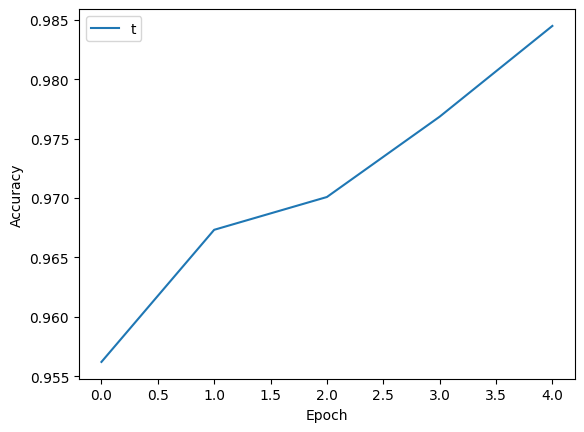

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc1, train_acc1)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend('train')

# **LSTM**

In [ ]:
from tensorflow.keras.layers import Embedding,LSTM,Dense

In [ ]:
model = Sequential()
model.add(Embedding(max_words,100, input_length=max_len))
model.add(LSTM(128))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs = 5
batch_size = 128

hist=model.fit(xt, yt, epochs=epochs, batch_size=batch_size)

Epoch 1/5
196/196 [==============================] - 35s 157ms/step - loss: 0.5033 - accuracy: 0.7556
Epoch 2/5
196/196 [==============================] - 20s 101ms/step - loss: 0.3076 - accuracy: 0.8736
Epoch 3/5
196/196 [==============================] - 14s 71ms/step - loss: 0.2343 - accuracy: 0.9089
Epoch 4/5
196/196 [==============================] - 11s 57ms/step - loss: 0.2170 - accuracy: 0.9182
Epoch 5/5
196/196 [==============================] - 11s 55ms/step - loss: 0.1926 - accuracy: 0.9263


In [ ]:
loss,accuracy=model.evaluate(xte,yte,batch_size=batch_size)
print("accuracy:",accuracy)
print("loss:",loss)

196/196 [==============================] - 3s 14ms/step - loss: 0.3218 - accuracy: 0.8742
accuracy: 0.8741599917411804
loss: 0.3218022584915161


In [ ]:
train_loss2 = hist.history['loss']
train_acc2 = hist.history['accuracy']
xc2=range(len(train_acc2))

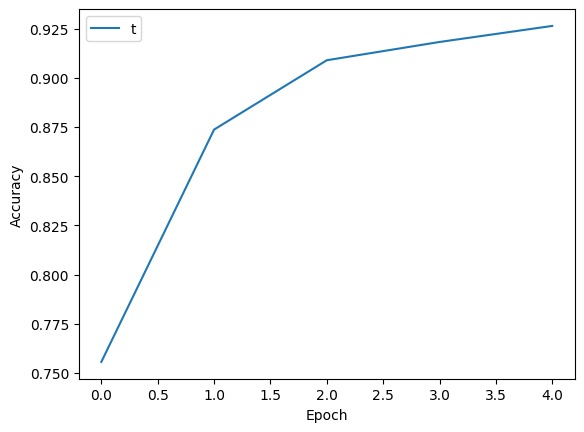

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc2, train_acc2)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend('train')

# **RNN**

In [ ]:
from tensorflow.keras.layers import Embedding,RNN
from keras import layers


In [ ]:
model = Sequential()
model.add(Embedding(max_words,100, input_length=max_len))
model.add(layers.LSTM(128))
model.add(layers.Dense(10))
model.add(Dense(units=1, activation='sigmoid'))

model = keras.Sequential()

model.add(layers.Embedding(input_dim=1000, output_dim=64))

//The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
model.add(layers.GRU(256, return_sequences=True))

// The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(128))

model.add(layers.Dense(10))

model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs = 5
batch_size = 128

h=model.fit(xt, yt, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 37s 221ms/step - loss: 0.5606 - accuracy: 0.7087 - val_loss: 0.3797 - val_accuracy: 0.8334
Epoch 2/5
157/157 [==============================] - 17s 106ms/step - loss: 0.3383 - accuracy: 0.8572 - val_loss: 0.3433 - val_accuracy: 0.8630
Epoch 3/5
157/157 [==============================] - 15s 96ms/step - loss: 0.2475 - accuracy: 0.9027 - val_loss: 0.3593 - val_accuracy: 0.8416
Epoch 4/5
157/157 [==============================] - 9s 58ms/step - loss: 0.2671 - accuracy: 0.8927 - val_loss: 0.4200 - val_accuracy: 0.8282
Epoch 5/5
157/157 [==============================] - 9s 59ms/step - loss: 0.1974 - accuracy: 0.9258 - val_loss: 0.3440 - val_accuracy: 0.8650


In [ ]:
loss,accuracy=model.evaluate(xte,yte,batch_size=batch_size)
print("accuracy:",accuracy)
print("loss:",loss)

196/196 [==============================] - 3s 14ms/step - loss: 0.3545 - accuracy: 0.8612
accuracy: 0.8611599802970886
loss: 0.3544613718986511


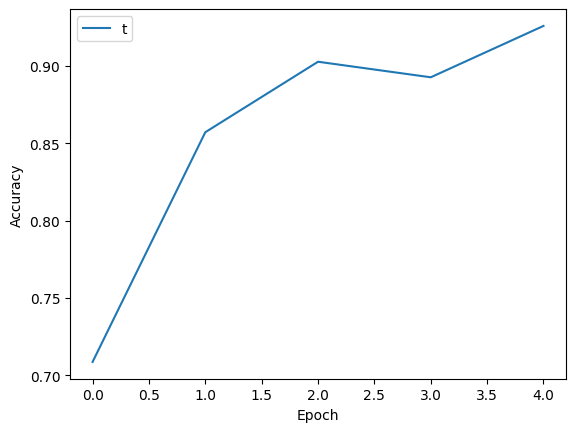

In [ ]:
train_loss3 = h.history['loss']
train_acc3 = h.history['accuracy']
xc3=range(len(train_loss3))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc3, train_acc3)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend('train')

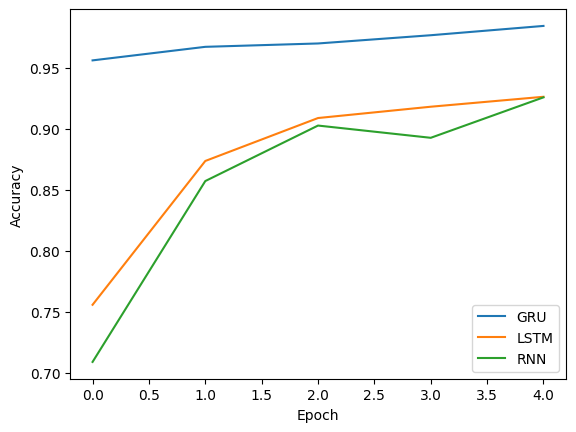

In [ ]:
plt.plot(xc1, train_acc1)
plt.plot(xc2, train_acc2)
plt.plot(xc3, train_acc3)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["GRU","LSTM","RNN"])